$$\require{mhchem}$$       

# Gas phase reaction with equilibria

We're interested in optimizing reactor conditions for several competing gas-phase reactions for a feed of $CO$, $O_2$, and $H_2$:
\begin{align*}
\ce{CO + 1/2O2 &<=> CO2}\\
\ce{H2 + 1/2O2 &<=> H2O}\\
\ce{CO + 2H2 &<=> CH4 + 1/2O2}\\
\ce{CO +H2 &<=> CH2O } \text{ (methanal)}\\
\ce{CO +H2 &<=> C2H2 + 1/2O2 } \text{ (acetylene)}
\end{align*}

#### First, determine the free energy for each of the reaction, $\Delta G_0$, at standard state (298 K, 1 atm) using the NIST chemistry webbook. 

#### The chemical potential of an ideal gas species is:
\begin{align}
\mu_i = \Delta G_i = \Delta G_{i,0} + RT\ln[y_iP]
\end{align}
where $y_iP$ is the partial pressure of each species. Evaluate the free energy of each reaction
at 1000 K and 1 atm partial pressure of each species using the shomate equation. Assume that the
shomate equation listed for room temperature (~300 K) applies to higher temperatures as well.
Hint: make sure that whatever you come up with, when evaluated at 298.15K, is close to the
answer above.

#### Evaluate the equilibrium constant for each reaction.

#### What does this say about the reactions?

#### Bonus:  Try to solve for the equilibrium constant ($K=exp(\Delta G_{i,0}/RT)$), but now use $\Delta G_i$ instead of $\Delta G_{i,0}$. If you run into numerical problems, then describe where these problems are coming from. Do you think it's appropriate to use $\Delta G_i$ instead of $\Delta G_{i,0}$ when calculating the equilibrium constant? Why or why not?

# The following reaction data were measured:
\begin{align*}\ce{A + B &<=> C} && E_a=5\: kJ/mol && \Delta G = -10\: kJ/mol\\
\ce{B + C &<=> 2D} && E_a=2\: kJ/mol && \Delta G = -15\: kJ/mol\\
\ce{ B + 2D &<=> 2E} && E_a=10\: kJ/mol && \Delta G = 2\: kJ/mol\\
\end{align*}

#### Calculate the equilibrium constant for each reaction at 1000 K

In [38]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [8]:
dG = np.array([-10e3, -15e3, 2e3]) # J/mol
R = 8.314 # J/mol/K
T = 1000 # K

K = np.exp (-dG / R / T)

for i in range(3):
    print('Reaction {:0.0f}  '.format(i), end='')
    print('K{:0.0f} = {:1.2f}'.format(i, K[i]))

Reaction 0  K0 = 3.33
Reaction 1  K1 = 6.08
Reaction 2  K2 = 0.79


#### Calculate the equilibrium mole fraction for a system that begins as an equimolar mixture of A,B,C,D,E at 1000 K and 1 atm. Assume isobaric and isothermal conditions.

In [35]:
sc = np.array([[-1, -1, 1, 0, 0],
              [0, -1, -1, 2, 0],
              [0, -1, 0, -2, 2]]).T
K1, K2, K3 = K

y0 = [0.2] * 5

def eq_y(xi):
    yA, yB, yC, yD, yE = y0 + np.matmul(sc, xi)
    
    res1 = yC / yA / yB - K1
    res2 = yD ** 2 / yB / yC - K2
    res3 = yE ** 2 / yB / yD ** 2 - K3
    
    return [res1, res2, res3]

xi_eq = fsolve(eq_y, [0.01, 0.01, 0.01])
print(xi_eq)
y_eq = y0 + np.matmul(sc, xi_eq)
print(y_eq)

[-0.0122292   0.05937866 -0.02885495]
[ 0.2122292   0.18170548  0.12839214  0.37646723  0.1422901 ]


#### Plot the equilibrium extent of each reaction (moles) as a function of temperature from 800 K to 1000 K

In [33]:
def eq_y_2(xi, K):
    K1, K2, K3 = K
    yA, yB, yC, yD, yE = y0 + np.matmul(sc, xi)
    
    res1 = yC / yA / yB - K1
    res2 = yD ** 2 / yB / yC - K2
    res3 = yE ** 2 / yB / yD ** 2 - K3
    
    return [res1, res2, res3]

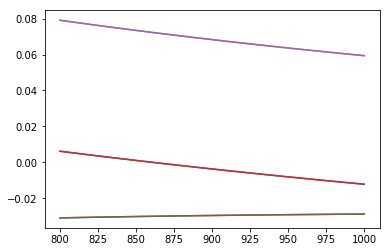

In [41]:
Tspan = np.linspace(800, 1000)

xi = []

for T in Tspan:
    K = np.exp (-dG / R / T)
    xi_T = fsolve(eq_y_2, [0.01, 0.01, 0.01], args = K)
    xi += [xi_T]

plt.plot(Tspan, xi)
plt.show()